#   Лабораторна робота № 2.

**Мета заняття** -вивчити та практично освоїти програмну нейронну мережу для розпізнавання рукописних цифр з бази їх зображень MNIST при використанні повнозв’язних нейронних шарів, дослідити вплив параметрів нейронної мережі на результати її роботи, розвинути навики використання програмно-апаратного середовища Google Colab для побудови та дослідження нейронних мереж.

**Нижче наведений базовий текст програми для нейронної мережі розпізнавання рукописних цифр з результатами її роботи, який розглядався в лабораторній роботі 1 лише як приклад для запуску в середовищі Google Colab.**

**Імпортування бібліотек**

In [ ]:
# MNIST Розпізнавання рукописних цифр
#Імпортування бібліотек
import keras
from keras.datasets import mnist
import sys
import numpy

**Зчитування даних і вивід на екран**

3
uint8
(60000, 28, 28)
60000
(10000, 28, 28)
10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   

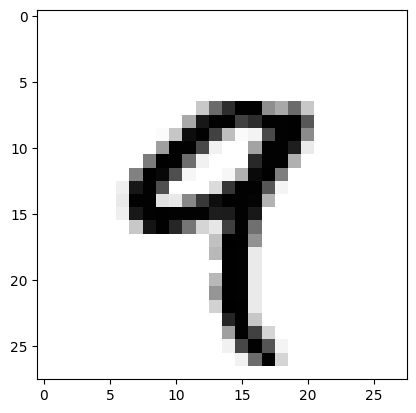

In [ ]:
# Усунення виводу даних на екран при їх зчитуванні
temp = sys.stdout
sys.stdout = open('log.txt','a')
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
sys.stdout.close()
sys.stdout = temp


# train_images - зображення для навчання
# train_labels - мітки зображень для навчання (значення цифр)
# test_images - тестові зображення
# test_labels - мітки тестових зображень
# Вивід на екран
print(train_images.ndim) # Розмірність зображень для навчання
print(train_images.dtype) # Тип даних зображень
print(train_images.shape) # Формат зображень для навчання
print(len(train_labels)) # Розмір масиву міток для навчання


# Встановлення режиму можливості повного виводу на екран великих масивів
numpy.set_printoptions(threshold=sys.maxsize)


# Вивід на екран
print(test_images.shape) # Формат тестових зображень
print(len(test_labels)) # Розмір масиву міток для тестових зображень


# Вибір зображення цифри з номером 4 та вивід на екран його числових даних
digit =train_images[4]
print(digit)


# Імпорт біблітеки графіки та вивід зображення на екран
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

**Створення і компіляція нейронної мережі**

In [ ]:
# Імпортування бібліотеки моделей структур нейронної мережі та бібліотеки шарів
from keras import models
from keras import layers


# Послідовна структура шарів нейронної мережі
network = models.Sequential()
# Два щільні шари нейронної мережі з відповідною кількістю нейронів та функціями активації
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
print(network.summary())
# Метод та параметри оптимізації при навчанні
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


**Зміна формату даних зображень для навчання і тестування. Зміна формату міток**

In [ ]:
# Зміна формату даних зображень для навчання
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# Зміна формату даних тестових зображень
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


# Зміна формату міток (1 у відповідній позиції, решта нулі)
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Навчання нейронної мережі. Визначення похибок та точності розпізнавання для тестових і навчальних зображень**

In [ ]:
# Навчання нейронної мережі
temp = sys.stdout
sys.stdout = open('log.txt','a')
history = network.fit(train_images, train_labels, epochs=10, batch_size=4096, validation_data=(test_images, test_labels),validation_steps=50)




# Визначення похибок та точності розпізнавання для зображень навчання
(train_loss, train_acc) = network.evaluate(train_images, train_labels)
sys.stdout.close()
sys.stdout = temp
print(train_loss)
print(train_acc)




# Визначення похибок та точності розпізнавання для тестових зображень
temp = sys.stdout
sys.stdout = open('log.txt','a')
(test_loss, test_acc) = network.evaluate(test_images, test_labels)
sys. stdout.close()
sys.stdout = temp
print(test_loss)
print(test_acc)

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


0.15982115268707275
0.9558500051498413
0.16201920807361603
0.9538000226020813


**Побудова графіки зміни точності та похибки в процесі навчання.**

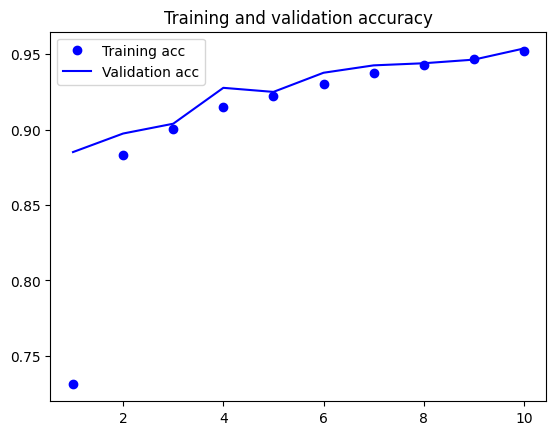

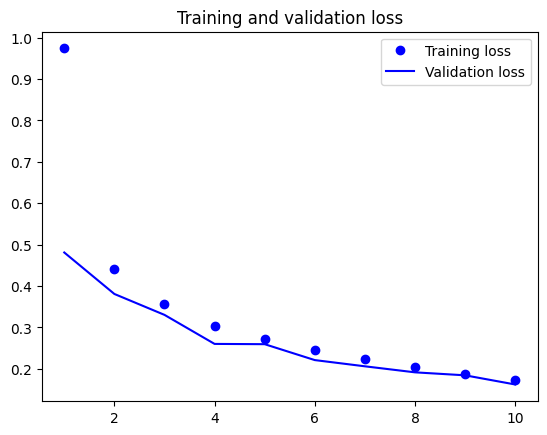

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

**Лабораторне завдання**

1. Запустити в середовищі Google Colab наведену базову програму розпізнавання рукописних цифр в базі MNIST. Зафіксувати результати: втрати та точність мережі на навчальних та тестових зображеннях.

2. Побудувати графіки зміни точності та похибки в процесі навчання. Проаналізувати результати.

3. Змінити в сторону збільшення та зменшення кількість нейронів у прихованому шарі та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.

4. Додати ще один повнозв’язний прихований шар нейронів з вибраною їх кількістю та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.

5. Замінити функцію оптимізатора на Adam та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.

6. Змінити розмір пакету batch_size та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.

7. Зменшити розмір масиву зображень для навчання та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.

8. Змінити функцію активації нейронів у прихованому шарі та проаналізувати зміни у результатах навчання та функціонування нейронної мережі.
